In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('spam.csv',encoding='latin')

In [ ]:
data.shape

(5572, 5)

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data['v1'].value_counts()/len(data)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [ ]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text

In [ ]:
data['v2'] = data['v2'].apply(preprocess_text)

In [ ]:
data['v2']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time try contact u u pound prize claim easy...
5568                               b go esplanade fr home
5569                                 pity mood suggestion
5570    guy bitch act like interested buying something...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [ ]:
encoder = LabelEncoder()
data['Label'] = encoder.fit_transform(data['v1'])

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Label
0,ham,go jurong point crazy available bugis n great ...,NaN,NaN,NaN,0
1,ham,ok lar joking wif u oni,NaN,NaN,NaN,0
2,spam,free entry wkly comp win fa cup final tkts st ...,NaN,NaN,NaN,1
3,ham,u dun say early hor u c already say,NaN,NaN,NaN,0
4,ham,nah think go usf life around though,NaN,NaN,NaN,0


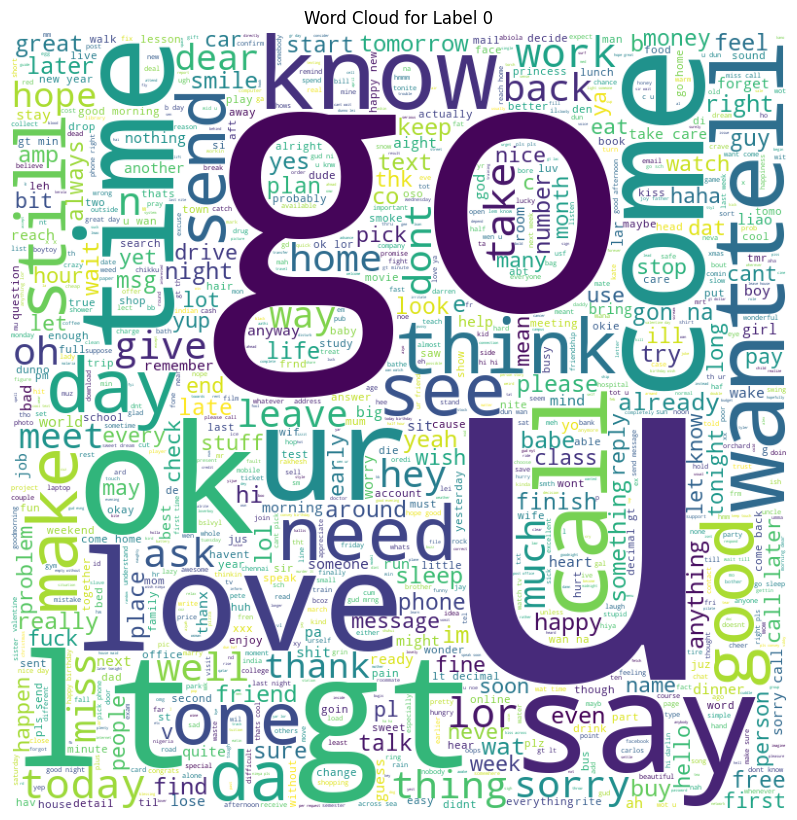

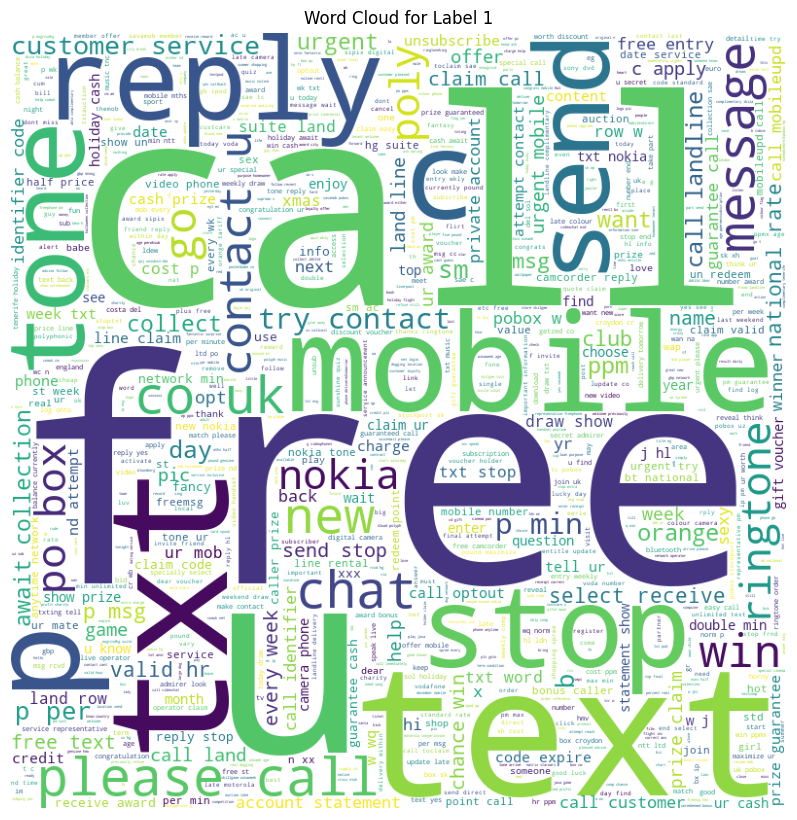

In [ ]:

text_label_0 = ' '.join(data[data['Label'] == 0]['v2'].values)

# Combine all cleaned tweets for label 1 into a single string
text_label_1 = ' '.join(data[data['Label'] == 1]['v2'].values)


# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Label 0')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Label 1')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
X = data['v2']
y=data['Label']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(4457,)

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
tfidf_X = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [ ]:
tfidf_X

<4457x5893 sparse matrix of type '<class 'numpy.float64'>'
	with 36177 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_test.shape

(1115, 5893)

In [ ]:
smote = SMOTE()

X_resampled,y_resampled = smote.fit_resample(tfidf_X,y_train)

In [ ]:
X_resampled

<7722x5893 sparse matrix of type '<class 'numpy.float64'>'
	with 102980 stored elements in Compressed Sparse Row format>

In [ ]:
lr = LogisticRegression()

lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [ ]:
y_pred=lr.predict(tfidf_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       964
           1       0.91      0.93      0.92       151

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[950  14]
 [ 10 141]]


In [ ]:
lr.fit(tfidf_X,y_train)

LogisticRegression()

In [ ]:
y_pred1= lr.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       964
           1       0.97      0.78      0.86       151

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115

[[960   4]
 [ 33 118]]


In [ ]:
svm = SVC()
svm.fit(X_resampled,y_resampled)


SVC()

In [ ]:
y_pred1= svm.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       964
           1       0.98      0.91      0.95       151

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[961   3]
 [ 13 138]]


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [ ]:
y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       964
           1       1.00      0.88      0.94       151

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[964   0]
 [ 18 133]]
